# Algorithme Welsh Powell 

## 1. Complexité
La complexité de l'algorithme de Welsh Powell dépend de ce que l'on utilise pour implémenter cette algorithme. Comme implémenté dans le document du projet, sa compléxité serait de O(n²).

Cependant avec une structure optimisé nous pourions descendre à O(nlog(n)+m), avec n le nombre de noeuds et m le nombre d'arrêtes.

### Explication 
Nous avons d'abord à trier les éléments par degrès, ce qui prendrait une complexité de O(nlog(n)). Puis nous devons parcourir tout les éléments de la pile, regarder touts les autres éléments de la pile pour savoir si il sont voisins et enfin dépiler. Ce qui nous donne une complexité de O(n²) mal optimisé, (n-1)+(n-2)+...+1 = O(n²). 

Cepdandant, nous pouvons implémenter une liste d'adjacence, simplement un liste des noeuds, qui pour chacun d'eux, possèdent une liste des voisins. Le tri sera alors toujours de la même compléxité, mais pour ce qui est du parcours des voisins, on ne passera seulement que par toutes les arrêtes donc m. Puisque l'on parle ici de graphe sans cycle, m < n, donc cela est plus efficace. 

## 2. Validité
L'algorithme de Welsh Powell est très efficace pour se rapprocher du nombre de couleurs dans certains cas et pour d'autre de trouver directement le nombre chromatique d'un graphe. Il n'est donc pas totalement efficace.

### Contre exemple
[contre exemple](https://github.com/GwennGrs/Coloration-d-un-graphe/blob/b0284005f8b4efa3fba94feaeb5e2499d2995d27/welsh_powel.ipynb)

## 3. Algorithme

In [19]:
def Welsh_Powell(S, A):
    n = len(S)
    couleurs = {sommet: 0 for sommet in S} 
    degres = {sommet: 0 for sommet in S}   
    for u, v in A:
        degres[u] += 1
        degres[v] += 1

    sommet_tries = sorted(S, key=lambda x: degres[x], reverse=True)

    for sommet in sommet_tries:
        couleurs_utilisees = set()
        for voisin in S:
            if (sommet, voisin) in A or (voisin, sommet) in A:
                if couleurs[voisin] != 0:
                    couleurs_utilisees.add(couleurs[voisin])
        couleur = 1
        while couleur in couleurs_utilisees:
            couleur += 1
        couleurs[sommet] = couleur  
    
    ordered_colors = [couleurs[sommet] for sommet in S]
    return ordered_colors 


In [22]:
# Test
S = ['A', 'B', 'C', 'D']
A = [('A', 'B'), ('B', 'C'), ('C', 'D'), ('D', 'A')]
result = Welsh_Powell(S, A)
print(result)

[1, 2, 1, 2]


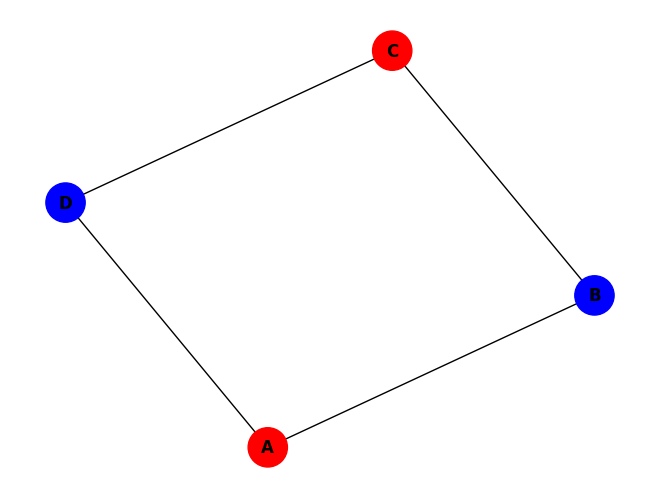

In [ ]:
import networkx as nx

import matplotlib.pyplot as plt

G = nx.Graph()
G.add_nodes_from(S)
G.add_edges_from(A)

node_colors = Welsh_Powell(S, A)

color_map = {1: 'red', 2: 'blue', 3: 'green', 4: 'yellow'}
colors = [color_map[color] for color in node_colors]

nx.draw(G, with_labels=True, node_color=colors, node_size=800, font_weight='bold')
plt.show()

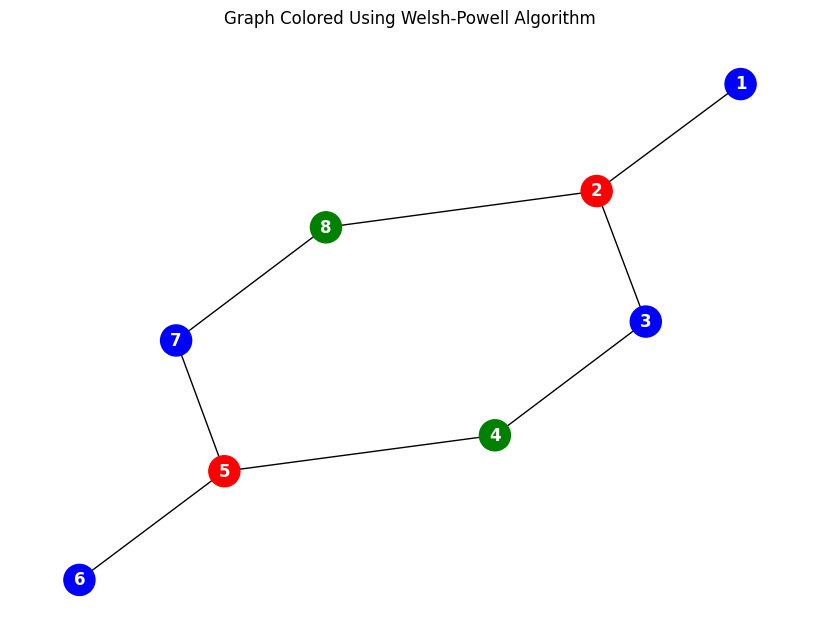

In [36]:
S = [1, 2, 3, 4, 5, 6, 7, 8]
A = [(1, 2), (2, 3), (3, 4), (4, 5), (5, 7), (7, 8), (8, 2), (5, 6)]

result = Welsh_Powell(S, A)
G = nx.Graph()
G.add_nodes_from(S)
G.add_edges_from(A)

color_map = {1: 'red', 2: 'blue', 3: 'green'}  # Map color numbers to visual colors
node_colors = [color_map[color] for color in result]

pos = nx.spring_layout(G)

plt.figure(figsize=(8, 6))
nx.draw(G, pos, with_labels=True, node_color=node_colors, node_size=500, font_size=12, font_color='white', font_weight='bold')
plt.title("Graph Colored Using Welsh-Powell Algorithm")
plt.show()